<h1 style="color: blue;">가. Image Augmentation</h1>

이미지 증강(Image Augmentation)은 딥러닝에서 많이 사용되는 기술 중 하나로, 이미지 데이터를 학습 전에 다양한 방법으로 변형시켜 학습 데이터의 양을 증가시키거나, 모델의 일반화 능력을 향상시키는 기술입니다.

예를 들어, 이미지를 좌우로 뒤집거나, 회전시키거나, 확대/축소시키거나, 밝기나 채도를 변화시키는 등 다양한 변형 기법을 이용하여 이미지를 증강시킵니다. 이를 통해 데이터의 다양성을 증가시켜 과적합(overfitting)을 방지하거나, 모델의 일반화 능력을 향상시켜 성능을 개선할 수 있습니다.

또한, 이미지 증강을 이용하면 학습 데이터셋의 크기를 증가시키는 효과도 얻을 수 있습니다. 적은 양의 원본 데이터를 다양한 방법으로 변형하여 새로운 데이터를 생성하면, 학습 데이터셋의 크기를 늘릴 수 있습니다. 이를 통해 딥러닝 모델의 성능을 개선하는데 큰 도움이 됩니다.

<h2 style="color: green;">이미지 증강의 필요성과 장점</h2>

+ 데이터 양 증가 : 딥러닝 모델은 데이터 양에 따라 성능이 크게 좌우됩니다. 그러나 많은 데이터를 수집하는 것은 어렵고 비용이 많이 듭니다. 이미지 증강 기술을 사용하면 기존 데이터를 다양한 방법으로 변형하여 새로운 데이터를 생성할 수 있습니다. 이를 통해 데이터의 양을 증가시킬 수 있습니다.

+ 일반화 성능 향상 : 딥러닝 모델은 학습 데이터에만 맞춰져 있으면 일반화 성능이 낮아질 수 있습니다. 이미지 증강 기술을 사용하면 다양한 변형을 가한 데이터를 학습하게 되므로, 모델의 일반화 성능을 향상시킬 수 있습니다.

+ 과적합 방지 : 딥러닝 모델이 학습 데이터에만 과도하게 맞춰지면, 새로운 데이터에 대한 예측 능력이 떨어질 수 있습니다. 이미지 증강 기술을 사용하면 데이터의 다양성을 증가시켜 모델이 학습 데이터에 과도하게 맞춰지지 않도록 방지할 수 있습니다.

+ 비용 절감: 이미지 증강은 기존 데이터를 다양한 방법으로 변형하여 새로운 데이터를 생성하는 것이므로, 데이터 수집 비용을 줄일 수 있습니다.

+ 성능 향상: 이미지 증강을 사용하면 딥러닝 모델의 성능을 향상시킬 수 있습니다. 데이터의 양과 다양성을 증가시키면서 일반화 성능을 향상시켜 과적합을 방지하므로, 모델의 정확도를 높일 수 있습니다.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2 style="color: green;">Image Augmentation - 반전</h2>

반전(Flip): 이미지를 좌우로 반전시켜 새로운 이미지를 생성합니다. 이미지 내의 대칭성을 이용하여 데이터셋을 다양화할 수 있습니다.

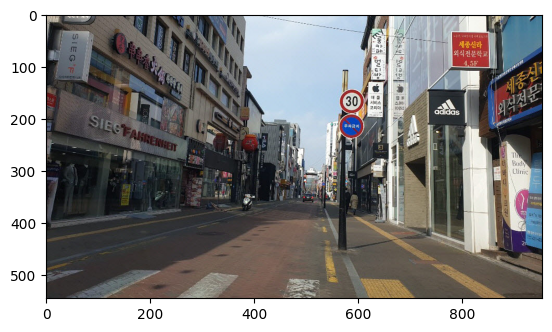

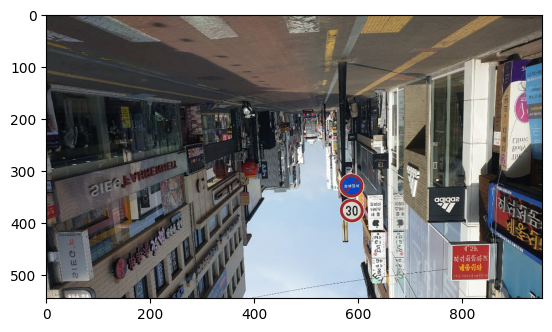

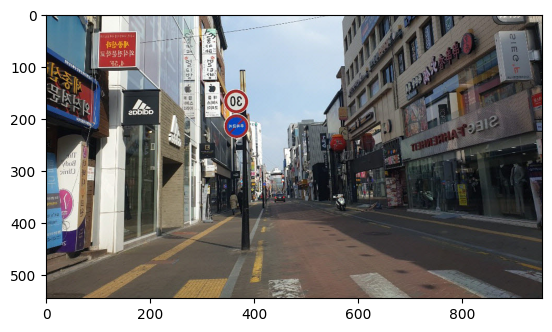

In [5]:
image = cv2.imread("../data/image02.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

flipped_img = cv2.flip(image, 0)  #상하반전
flipped_img_leftright = cv2.flip(image, 1)  #좌우반전
#1 좌우, 0 상하

#원본 이미지 보기
plt.imshow(image)
plt.show()

#이미지 반전
plt.imshow(flipped_img)
plt.show()

plt.imshow(flipped_img_leftright)
plt.show()

<h2 style="color: green;">Image Augmentation - 이미지 크롭</h2>

이미지에서 일부 영역을 잘라내는 방법은 OpenCV의 cv2.crop() 함수를 사용하면 됩니다. cv2.crop() 함수는 이미지에서 지정한 좌표와 크기에 해당하는 영역을 잘라내는 함수입니다.

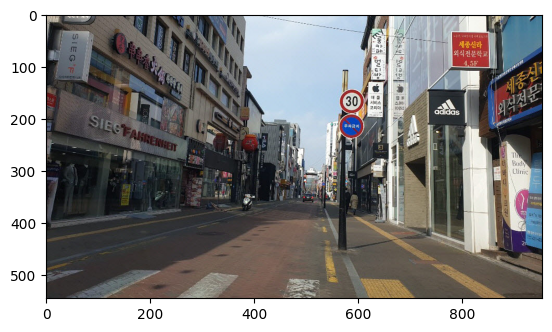

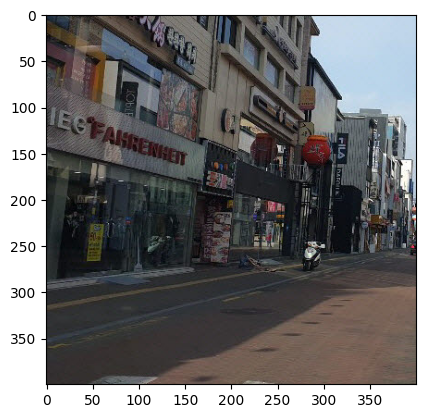

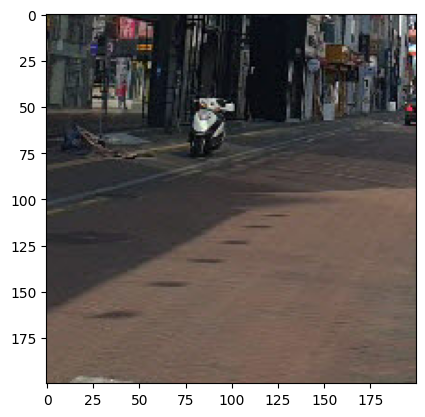

In [6]:
x, y, w, h = 300, 300, 200, 200  #(300 * 300) 좌표에서 (200 * 200)크기로 자를 것임
crop_img_wide = image[y-h:y+h, x-w:x+w]  #(x,y)를 중심으로 2w, 2h 크기로 자름
crop_img_lt = image[y:y+h, x:x+w]  #(x,y)를 기준으로 (w,h)만큼 오른쪽 아래로 자름

plt.imshow(image)
plt.show()

plt.imshow(crop_img_wide)
plt.show()

plt.imshow(crop_img_lt)
plt.show()

<h2 style="color: green;"><h2 style="color: green;">cv2.warpAffine()</h2></h2>

OpenCV에서는 이미지 변형을 수행하는 여러 함수를 제공합니다. 
이 중 대표적인 함수로는 cv2.warpAffine() 함수와 cv2.warpPerspective() 함수가 있습니다.

cv2.warpAffine() 함수는 2x3 크기의 변환 행렬을 이용하여 이미지를 변형합니다. 변환 행렬은 이미지를 **이동, 회전, 확대/축소** 등의 변형을 적용할 수 있는 행렬입니다.

### *회전*

(Rotation): 이미지를 일정한 각도로 회전시켜 새로운 이미지를 생성합니다. 일정한 각도만큼 회전을 시키면 이미지의 불변성을 유지하면서 데이터셋을 다양화할 수 있습니다.

높이 545, 너비 954


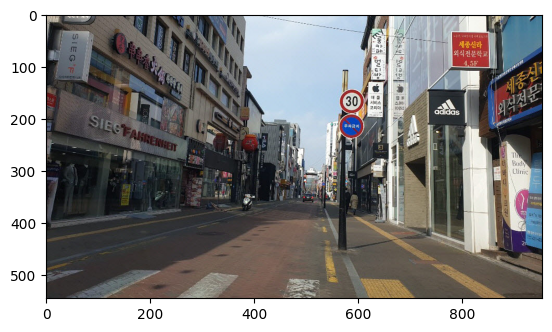

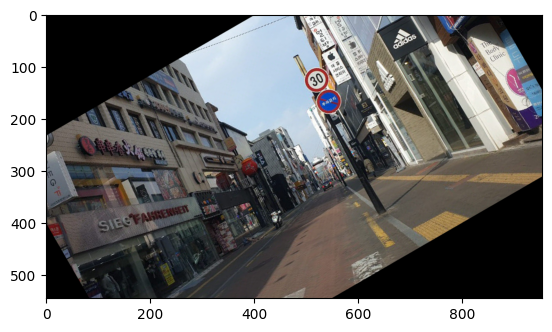

In [7]:
angle = 30

h, w, c = image.shape
print(f"높이 {h}, 너비 {w}")
center = (w/2, h/2)

#회전 변환 행렬 생성
M = cv2.getRotationMatrix2D(center, angle, 1.0)
#1.0은 크기 비율을 나타낸다.

rotated_img = cv2.warpAffine(image, M, (w,h))

plt.imshow(image)
plt.show()

plt.imshow(rotated_img)
plt.show()

### *확대/축소*

확대/축소(Zoom): 이미지를 확대하거나 축소시켜 새로운 이미지를 생성합니다. 이 기법은 이미지의 일부분만 확대하거나 축소시키는 방식으로 적용할 수 있습니다.

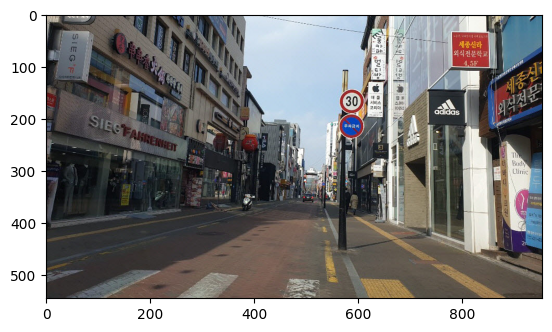

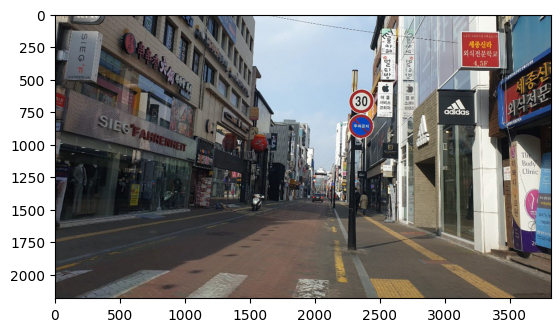

In [10]:
h, w = image.shape[:2]

zoom_scale = 4 #이미지 확대/축소 배율
zoomed_img = cv2.resize(image, (w*zoom_scale, h*zoom_scale), interpolation=cv2.INTER_CUBIC)
            #resize(원본 이미지, (최종 너비, 최종 높이), 이미지 보간 방법(ex: cv2.INTER_CUBIC))

plt.imshow(image)
plt.show()

plt.imshow(zoomed_img)
plt.show()

### *이동*

이동(Shift): 이미지를 좌우, 상하로 이동시켜 새로운 이미지를 생성합니다. 이동은 회전과 마찬가지로 이미지의 불변성을 유지하면서 데이터셋을 다양화할 수 있습니다.

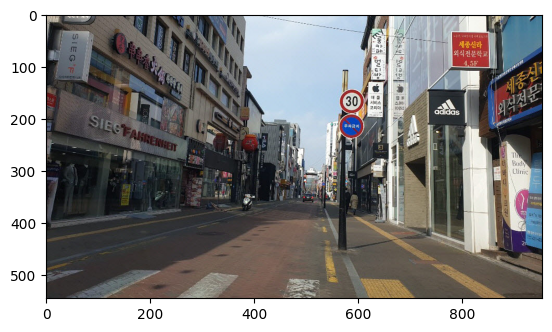

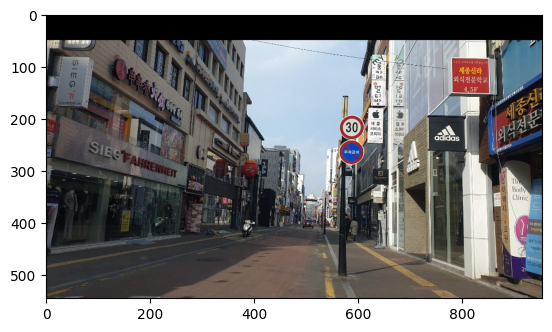

In [11]:
shift = (0, 50)
M = np.float32([
    [1, 0, shift[0]],
    [0, 1, shift[1]]
])

"""
첫 번째 행 [1, 0, shift[0]]은 수평 이동을 나타냅니다. 1은 수평 방향으로 이동하지 않음을 의미하고, shift[0] 값은 수평 이동 거리를 나타냅니다.

두 번째 행 [0, 1, shift[1]]은 수직 이동을 나타냅니다. 1은 수직 방향으로 이동하지 않음을 의미하고, shift[1] 값은 수직 이동 거리를 나타냅니다.
"""

shifted_img = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

plt.imshow(image)
plt.show()

plt.imshow(shifted_img)
plt.show()

### *Random Rotate Augmentation을 사용하지 말아야 하는 경우*

+ 데이터 확대를 수행할 때 확대가 데이터 세트에 적합한 선택인지 결정하기 위해 확대가 이미지에 수행하는 모든 작업을 고려하는 것이 중요합니다. 경우에 따라 임의 회전이 데이터 세트에 적합하지 않을 수 있습니다. 
<br></br>
+ 참고로 이미지를 임의로 회전하려면 이미지의 모서리가 위쪽과 아래쪽에서 잘리거나 가장자리가 잘리지 않도록 이미지 크기를 늘려야 합니다. 
<br></br>
+ 임의회전을 사용하지 않는 것을 고려해야하는 첫번째 이유는 이미지의 원래 모서리에 중요한 콘텐츠가 있는 경우입니다. 
<br></br>
+ 둘째, 회전 후 이미지 모서리를 알 수 없으며 패딩으로 채워야 합니다. 이것이 우리가 보는 검은 공간입니다. 
<br></br>
+ 셋째, 이미지 속 사물이 자연스럽게 회전하지 않는 영역 설정일 수 있습니다. 예를 들어 도로를 달리는 자동차의 거리 표지판입니다. 
<br></br>
+ 넷째, 이미지가 회전하면 경계 상자도 회전해야 하며 경계 상자는 회전 시 확장됩니다(정사각형이 아닌 경 우) 경계 상자가 많은 경우 모델이 그렇지 않은 경우보다 훨씬 더 큰 개체를 예측하도록 권장되기 때문에 이것은 문제가 될수있습니다.

<h2 style="color: green;">Image Augmentation - Noise</h2>

노이즈 추가(Noise addition): 이미지에 노이즈를 추가하여 새로운 이미지를 생성합니다. 이 기법은 이미지가 포함하는 정보에 대한 감도를 높이고, 모델이 더 일반적인 데이터셋에서도 동작할 수 있도록 합니다.

### *Salt-and-Pepper Noise 실습*

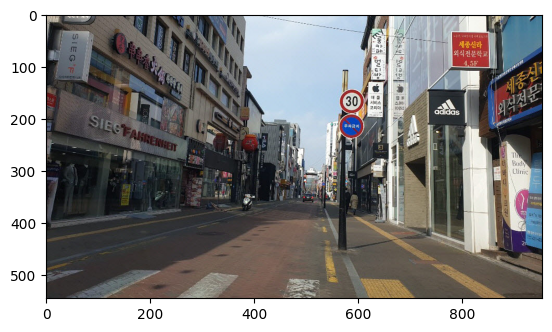

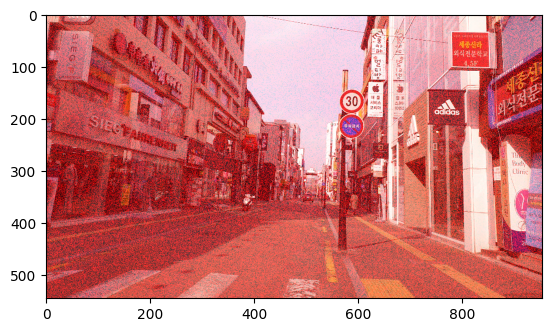

In [14]:
noise = np.zeros(image.shape, np.uint8)  #uint8 = unsigned int 8-bit
                                         #부호 없는 1바이트 정수
cv2.randu(noise, 0, 255)
#cv2.randu() 함수는 주어진 범위 내에서 무작위로 배열을 생성하는 함수입니다. 주어진 배열에 무작위 값으로 채웁니다.
black = noise < 30
white = noise >255
noise[black] = 0
noise[white] = 255

#노이즈 채널 변수 생성
#여기에 30밑은 블랙 255초과는 화이트로 적용된 랜덤 배열값을 노이즈 채널 변수에 할당
noise_b = noise[:, :, 0]
noise_g = noise[:, :, 1]
noise_r = noise[:, :, 2]

#각 채널 노이즈를 병합하여 노이즈 이미지 생성
noise_img = cv2.merge([
    cv2.add(image[:, :, 0], noise_b),
    cv2.add(image[:, :, 1], noise_g),
    cv2.add(image[:, :, 2], noise_r),
])

#원본 이미지 보기
plt.imshow(image)
plt.show()

#노이즈
plt.imshow(noise_img)
plt.show()

### *Gaussian noise 실습*

Gaussian Noise는 영상의 밝기 값을 정규 분포를 따르는 확률 분포에서 무작위로 선택하여 생성되는 노이즈입니다. 이러한 노이즈는 디지털 영상에서 발생하는 가장 일반적인 노이즈 형태 중 하나이며, 주로 카메라의 노이즈, 약한 신호의 노이즈, 전송 잡음 등으로 인해 발생합니다.
 
 Gaussian Noise는 영상에서 연속적으로 분포하므로, 영상처리나 노이즈 제거 기술에서 필터링 및 노이즈 제거 기술에 자주 사용됩니다.

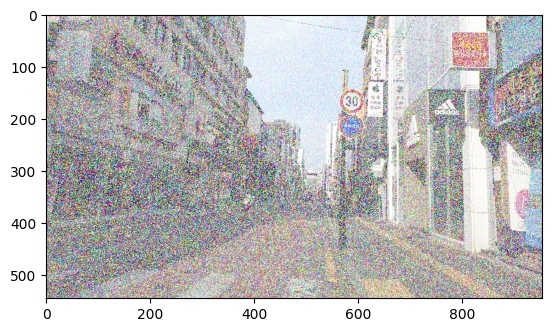

In [16]:
mean = 0
var = 100
sigma = var ** 0.5

gauss = np.random.normal(mean, sigma, image.shape)
gauss = gauss.astype('uint8')
#print(gauss)

noise_img = cv2.add(image, gauss)

#노이즈
plt.imshow(noise_img)
plt.show()

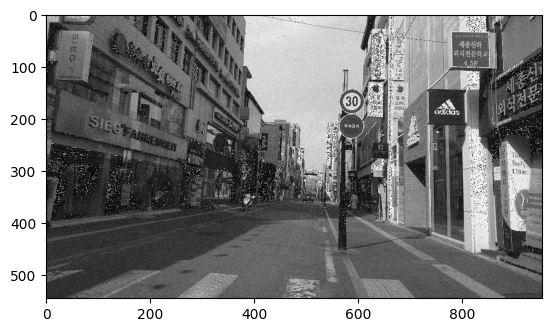

In [13]:
image = cv2.imread('../data/image02.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
h, w = image.shape
mean = 0  #평균
var = 100  #분산 (노이즈의 크기)
sigma = var ** 0.5  #표준편차 

#노이즈 생성
gaussian = np.random.normal(mean, sigma, (h,w))
gaussian = gaussian.reshape(h, w)
noisy_image = image + gaussian.astype(np.uint8)

plt.imshow(noisy_image, 'gray')
plt.show()

### *노이즈 제거 - 중간값 필터*

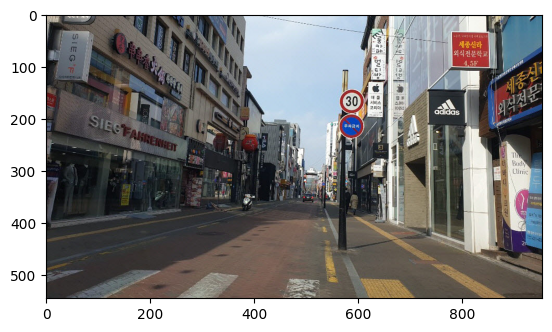

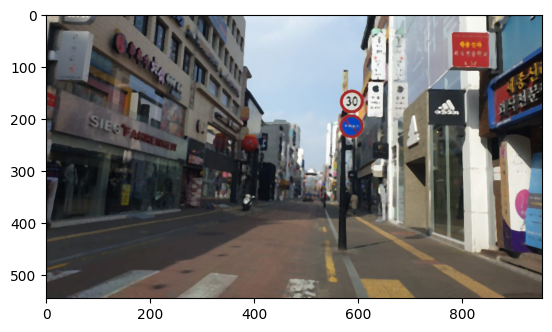

In [15]:
image = cv2.imread('../data/image02.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img_filtered = cv2.medianBlur(image, 5)

#원본 이미지
plt.imshow(image)
plt.show()

#노이즈 제거
plt.imshow(img_filtered)
plt.show()